<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

LEONARDDO LÓPEZ

### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [4]:
import os, geopandas as gpd
countries=gpd.read_file(os.path.join("maps","World_country","World_Countries.shp"))


In [5]:
argentina=countries[countries.COUNTRY=='Argentina']

In [6]:
argentina.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# check units of measurement
argentina.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [8]:
# is this CRS projected?
argentina.crs.is_projected

False

In [11]:
# recommended for Argentina in general (meters)
argentina.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

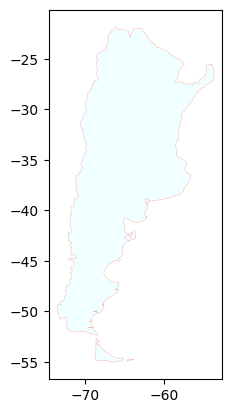

In [15]:
argentina.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [17]:
prov=gpd.read_file(os.path.join("maps","Provincias","provinciaPolygon.shp"))
ferrov=gpd.read_file(os.path.join("maps","Ferroviarias","lineas_de_transporte_ferroviario_AN010Line.shp"))
energy=gpd.read_file(os.path.join("maps","Energia","puntos_de_energia_AD010Point.shp"))

Verifiquemos que todas las layers se encuentren proyectadas

In [21]:
prov.crs.is_projected

False

In [22]:
ferrov.crs.is_projected

False

In [23]:
energy.crs.is_projected

False

Dado que ninguna se encuentra poyectada, es necesario realizar el siguiente procedimiento

In [24]:
prov.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [25]:
ferrov.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [26]:
energy.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

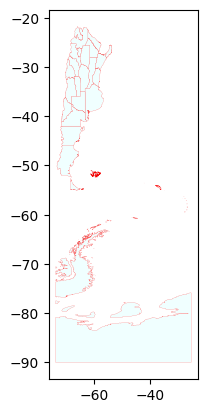

In [27]:
prov.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

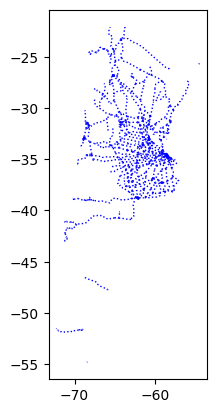

In [28]:
ferrov.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

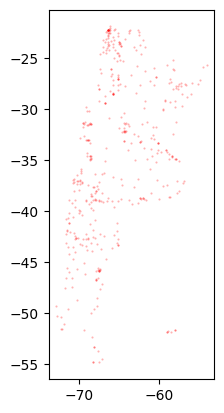

In [29]:
energy.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

Adicionamos las tres capas anteriores a la primera capa que sacamos

<Axes: >

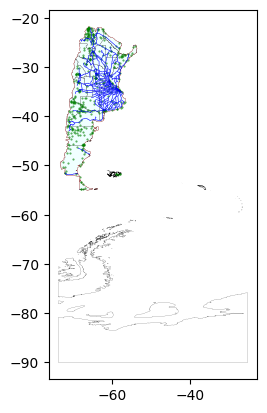

In [38]:
base = argentina.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.15)
prov.plot(facecolor="None",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12),ax=base)

ferrov.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
energy.plot(marker='.', color='green', markersize=1,alpha=0.7,
            ax=base) # on top of...


Ahora salvamos el mapa en un archivo GPKG

In [39]:
## saving

import os

argentina.to_file(os.path.join("maps","argentinaMap_5343.gpkg"), layer='World_country', driver="GPKG")
prov.to_file(os.path.join("maps","provincia.gpkg"), layer='Provincias', driver="GPKG")
ferrov.to_file(os.path.join("maps","ferrovias.gpkg"), layer='Ferroviarias', driver="GPKG")
energy.to_file(os.path.join("maps","energia.gpkg"), layer='Energia', driver="GPKG")

## Creating Spatial data

You have a "data"folder in **Paideia** with a CSV file with information on the airports in Brazil. Create a similar 'data' folder in your local computer, inside the current _repo_.

Let's open the **CSV**:

In [ ]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


This needs some cleaning:

In [ ]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

In [ ]:
# keep the  columns needed

infoairports.columns


In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

Some formatting:

In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [ ]:
# now
infoairports.info()

In [ ]:
# let's plot

base = brazil_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Why is it wrong?

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = brazil_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [ ]:
#remember:
type(airports), type(infoairports)

Let's re project!

In [ ]:
airports_5641=airports.to_crs(5641)

## then

base = brazil_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)

Remember you have type of airports:

In [ ]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

We may use that in the future. For now, just rename the **type** column to a different one.

In [ ]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

<a class="anchor" id="11"></a>

## Formating Geoseries projections



You know **brazil_5641** is a multipolygon:

In [ ]:
brazil_5641

Sometime, you just need the border (lines):

In [ ]:
brazil_5641.boundary

In [ ]:
# This is just the borderline
brazil_5641.boundary.plot()

Always check the data type:

In [ ]:
# does 'boundary' return a GDF?
type(brazil_5641.boundary)

Some operations in geopandas require GDF or GS. If you need a GDF instead of a GS:

In [ ]:
# converting into GDF
brazil_5641.boundary.to_frame()

In [ ]:
brazil_5641.boundary.to_frame().info()

Notice you get a very simple GDF, and you may want to add some information:

In [ ]:
# conversion
brazil_border=brazil_5641.boundary.to_frame()

# new column (optional)
brazil_border['name']='Brazil'

# renaming the geometry column
brazil_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
brazil_border = brazil_border.set_geometry("geometry")

# verifying:
brazil_border.crs

In [ ]:
brazil_border

You can add this GDF as a layer.

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Download the compressed file "Brazil_subnational". Unzip or decompress that files. Move the decompressed folder into your current _maps_ folder.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2):

In [ ]:
brazil_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
brazil_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

They are maps, for sure:

In [ ]:
type(brazil_states), type(brazil_municipalities)

In [ ]:
brazil_states.geometry.head()

In [ ]:
brazil_municipalities.geometry.head()

But, notice this:

In [ ]:
brazil_states.crs, brazil_municipalities.crs

They do not have crs information, however they can be plotted:

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


Since we are using the crs 5641 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [ ]:
## uncomment this to see the error message
# brazil_states.to_crs(5641)

Python says _"Please set a crs on the object first"_. This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [ ]:
# set as unprojected
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [ ]:
brazil_states=brazil_states.to_crs(5641)
brazil_municipalities=brazil_municipalities.to_crs(5641)

In [ ]:
brazil_states.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='states', driver="GPKG")
brazil_municipalities.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='municipalities', driver="GPKG")

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [ ]:
countries.head()

Let add some information to each country:

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [ ]:
onlyFragilCia

In [ ]:
# and here
onlyMap

## Fuzzy merging

Let's find similar names:

In [ ]:
# !pip install thefuzz

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

Preparing a _dict_ of changes:

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

Making changes and updating:

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:

pd.melt(theMapAndData[DataNames])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

* **StandardScaler**:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

In [ ]:
# !pip install mapclassify

Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

We are ready for a choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>